In [ ]:
#step1 加载数据
#step2 数据特征处理阶段：采用可视化方式对数据做简单处理，把握数据概况
#step3 分类模型训练阶段：采用pipeine方式，第一步：数据规范化，
#                     第二步：采用SVC，KNN，决策树，RF模型 都训练数据集，
#                     用gridsearchCV工具，找到每个分类器的最优参数和最优分数，
#                     最终找到最适合的分类器和分类器的参数。

In [22]:
import pandas as pd
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
#数据加载，查看数据集大小,数据概况，做特征工程
data = pd.read_csv('/Applications/py_workspace/data_mining/data/UCI_Credit_Card.csv')
print(data.shape)
print(data.describe())


(30000, 25)
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904  

In [24]:
#查看下雨个月违规率的情况, value_counts()查看某列有多少不同值，并计算每个不同值在该列中有多少重复值
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


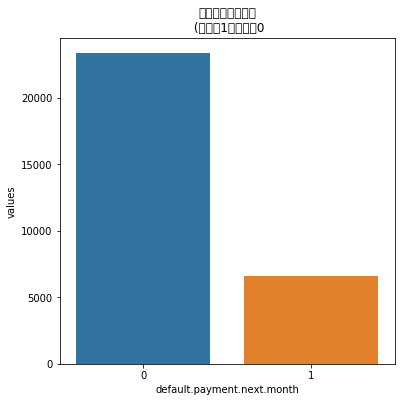

In [25]:
df = pd.DataFrame({'default.payment.next.month':next_month.index, 'values': next_month.values})
plt.figure(figsize=(6,6))
plt.title('信用卡违约率客户\n (违约：1，守约：0')
sns.set_color_codes('pastel')
sns.barplot(x = 'default.payment.next.month', y='values', data = df)
locs, labels = plt.xticks()
plt.show()

In [26]:
data.drop(['ID'], inplace = True, axis = 1)
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

#构造训练集，测试集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size = 0.3, stratify = target, random_state = 1)


In [39]:
#pipeline 构造svm，DecisionTree，RF，KNeighbors分类器，
classifiers = [
    SVC(random_state = 1, kernel='rbf'),
    DecisionTreeClassifier(random_state = 1, criterion='gini'),
    RandomForestClassifier(random_state=1, criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
]

#分类器名称
classifier_names = [
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborclassifier',
]

#分类器参数
classifier_param_grid = [
    {'svc__C':[1], 'svc__gamma':[0.01]},
    {'decisiontreeclassifier__max_depth': [6,9,11]},
    {'randomforestclassifier__n_estimators': [3,5,6]},
    {'kneighborclassifier__n_neighbors': [4,6,8]},
]


In [40]:
#对具体的分类器进行GridSearchCV参数调优，参数自动搜索模块，输入要调优的的参数和参数的取值范围，计算每种参数的结果，并可以输出最优结果，这里我们都是输出最优结果。
#@estimator：想要采用的分类器
#@param_grid：想要优化的参数及取值，
#@cv：交叉验证的折数，默认三折交叉验证
#@scoring：准确度的评价标准，

def GridSearchCV_work(pipe, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator=pipe, param_grid= param_grid, scoring=score)
    #寻找最优的参数和最优的准确率分数
    search = gridsearch.fit(train_x, train_y)
    print("gridsearch最优参数：", search.best_params_)
    print("gridsearch最优分数：", search.best_score_)

    predict_y = gridsearch.predict(test_x)
    print("accuracy：", accuracy_score(test_y, predict_y))

    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y, predict_y)
    return response

In [41]:
#pipeline：流水线作业，每一步均采用（名称，步骤）的方式进行

for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        (model_name, model),
    ])
    GridSearchCV_work(pipe, train_x, train_y, test_x, test_y, model_param_grid, score='accuracy')

gridsearch最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
gridsearch最优分数： 0.8186190476190477
accuracy： 0.8172222222222222
gridsearch最优参数： {'decisiontreeclassifier__max_depth': 6}
gridsearch最优分数： 0.8208095238095238
accuracy： 0.8113333333333334
gridsearch最优参数： {'randomforestclassifier__n_estimators': 6}
gridsearch最优分数： 0.8004285714285713
accuracy： 0.7994444444444444
gridsearch最优参数： {'kneighborclassifier__n_neighbors': 8}
gridsearch最优分数： 0.804
accuracy： 0.8035555555555556
